### Heart Desease Prediction [Feature importance by eli5]

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [48]:
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Heart_deasease_Prediction\heart.csv") 

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


The dataset looks fairly clean and simple. Let us understand the column names

 - age: Age in years
 - sex: Gender (1 = male, 0 = female)
 - cp: The chest pain experienced (
      - 1: typical angina
      - 2: atypical angina
      - 3: non-anginal pain
      - 4: asymptomatic
 - trestbps: Resting blood pressure (mm Hg on admission to the hospital)
 - chol: Cholesterol measurement in mg/dl
 - fbs:  Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
 - restecg: Resting electrocardiographic measurement 
      - 0 = normal
      - 1 = having ST-T wave abnormality
      - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
 - thalach: The person's maximum heart rate achieved
 - exang: Exercise induced angina 
      - 1 = yes
      - 0 = no
 - oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
 - slope: the slope of the peak exercise ST segment 
      - 1: upsloping
      - 2: flat
      - 3: downsloping
 - ca: The number of major vessels (0-3)
 - thal: A blood disorder called thalassemia 
      - 3 = normal
      - 6 = fixed defect
      - 7 = reversable defect
 - target: Heart disease 
      - 0 = no
      - 1 = yes

In [52]:
#Categorical variable of the dataset:
cat = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
#Numerical variable of the dataset:
num = ['age','trestbps','chol','thalach','oldpeak']

In [53]:
all_numeric = df[num]
cor = all_numeric.corr()

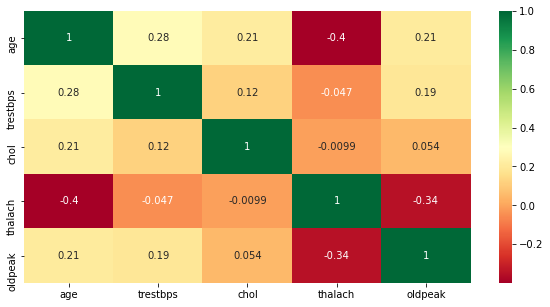

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(cor,cmap = "RdYlGn",annot=True)
plt.show()

There is no much correlation between the numeric columns

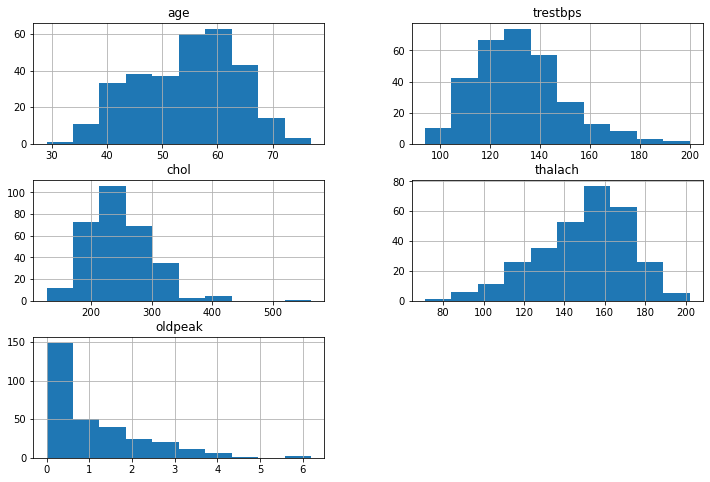

In [55]:
#check the distribution of the numerical variable
df1 = df[num]
df1.hist(figsize=(12,8))
plt.show()

 We can see that most of the columns are normally distributed but oldpeak is has a right skewed. 

Check if the dataset is imbalanced

<AxesSubplot:xlabel='target', ylabel='count'>

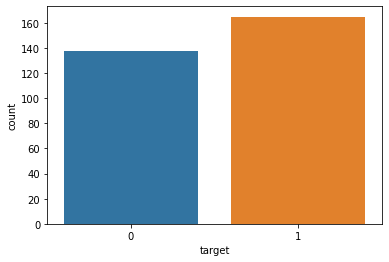

In [56]:
sns.countplot(x='target',data=df)

Categorical Data Proessing

In [57]:
df1 = pd.get_dummies(df, columns = [ 'cp', 'restecg', 'slope', 'ca', 'thal'],drop_first=True)

In [58]:
df1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


Numerical Data Processing

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df1[num] = standardScaler.fit_transform(df1[num])

In [60]:
df1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [62]:
y = df1['target']
X = df1.drop(['target'], axis = 1)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [65]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

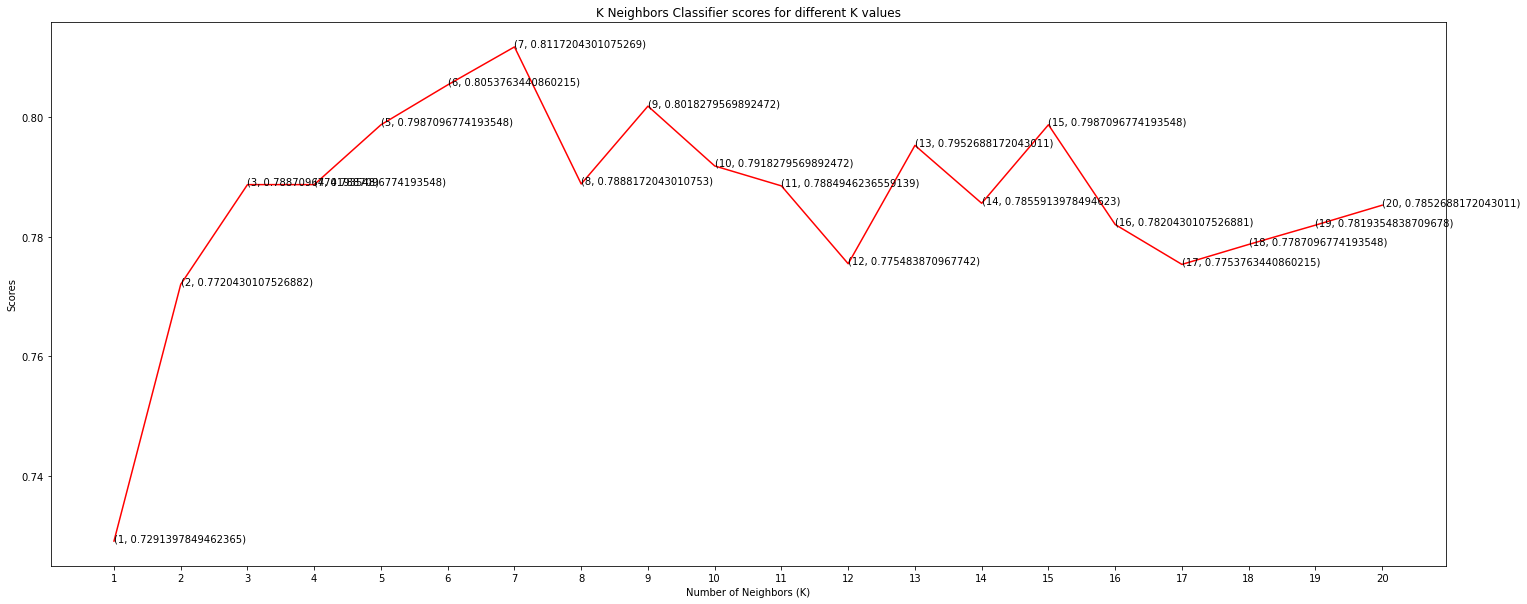

In [74]:
plt.figure(figsize=(25,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red',)
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [75]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [76]:
score.mean()


0.775483870967742

Random Forest

In [77]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split

In [78]:
# Store independant variables to X
X = df.drop(['target'], axis = 1)
# Store dependant variable to y
y = df['target']

In [79]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (212, 13)
X_test: (91, 13)
y_train: (212,)
y_test: (91,)


In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [84]:
prediction=random_forest_model.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[35 11]
 [ 3 42]]
0.8461538461538461
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        46
           1       0.79      0.93      0.86        45

    accuracy                           0.85        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.85      0.85        91



In [86]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [87]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [88]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 670,
 'criterion': 'gini'}

In [93]:
best_random_grid=rf_randomcv.best_estimator_

In [94]:
y_pred=best_random_grid.predict(X_test)

In [95]:
y_pred=best_random_grid.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[36 10]
 [ 3 42]]
Accuracy Score 0.8571428571428571
Classification report:               precision    recall  f1-score   support

           0       0.92      0.78      0.85        46
           1       0.81      0.93      0.87        45

    accuracy                           0.86        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91



In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [670], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [98]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 12.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [99]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=670, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
best_grid=grid_search.best_estimator_

In [101]:
y_pred=best_grid.predict(X_test)

In [108]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))
confusion = confusion_matrix(y_test,y_pred)

[[36 10]
 [ 3 42]]
Accuracy Score 0.8571428571428571
Classification report:               precision    recall  f1-score   support

           0       0.92      0.78      0.85        46
           1       0.81      0.93      0.87        45

    accuracy                           0.86        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91



In [103]:
print(best_grid.feature_importances_)

[0.08754573 0.03522086 0.11230013 0.07292377 0.07868304 0.00850112
 0.01861244 0.11482142 0.0337462  0.12552712 0.04611876 0.13950397
 0.12649545]


In [104]:
feature_imp = pd.Series(best_grid.feature_importances_,index=X_test.columns)

<AxesSubplot:>

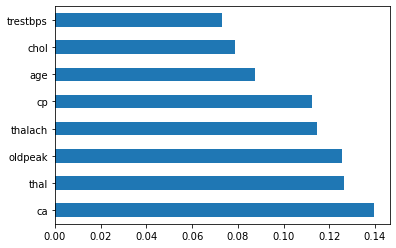

In [105]:
feature_imp.nlargest(8).plot(kind='barh')

In [110]:
sensitivity = confusion[0,0]/(confusion[0,0]+confusion[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion[1,1]/(confusion[1,1]+confusion[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9230769230769231
Specificity :  0.8076923076923077


ROC Curve

In [111]:
from sklearn.metrics import roc_curve, auc 

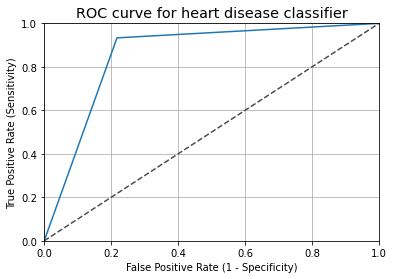

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

As a standard rule of AUC, we know that
 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail

In [113]:
auc(fpr, tpr)

0.8579710144927537

Hence, the model is working good

We also can see the feature importance by using purmutation importance. It can be achieved by eli5 library. The more information can be found in the below link:
https://www.kaggle.com/dansbecker/permutation-importance

In [117]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

In [119]:
perm = PermutationImportance(best_grid, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0418 ± 0.0448,ca
0.0308 ± 0.0292,thal
0.0308 ± 0.0164,thalach
0.0308 ± 0.0323,cp
0.0242 ± 0.0323,sex
0.0176 ± 0.0224,exang
0.0154 ± 0.0264,chol
0.0154 ± 0.0108,slope
0.0132 ± 0.0448,oldpeak
0.0066 ± 0.0108,trestbps
